<a href="https://colab.research.google.com/github/MariusJalba/Projects/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

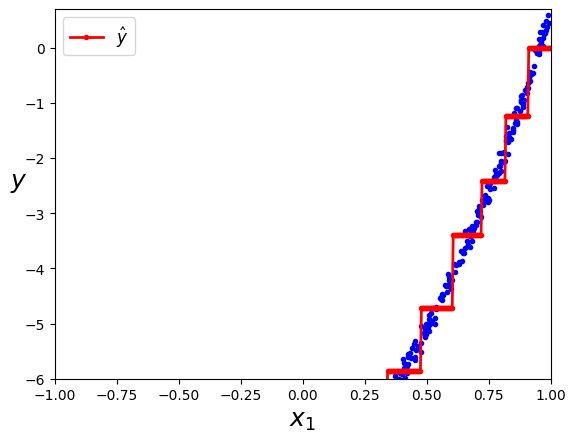

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def plot_regression_predictions(tree_reg, X, y, axes=[-1, 1, -6, 0.7]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.legend(loc="upper left", fontsize=12)

X = np.random.rand(350, 1)
y = pow(X + 1.2, 3) - 10 + np.random.randn(350, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
tree_reg.fit(X, y)

plot_regression_predictions(tree_reg, X, y)
plt.show()


In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, train_size= 0.85, random_state=42)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9259259259259259


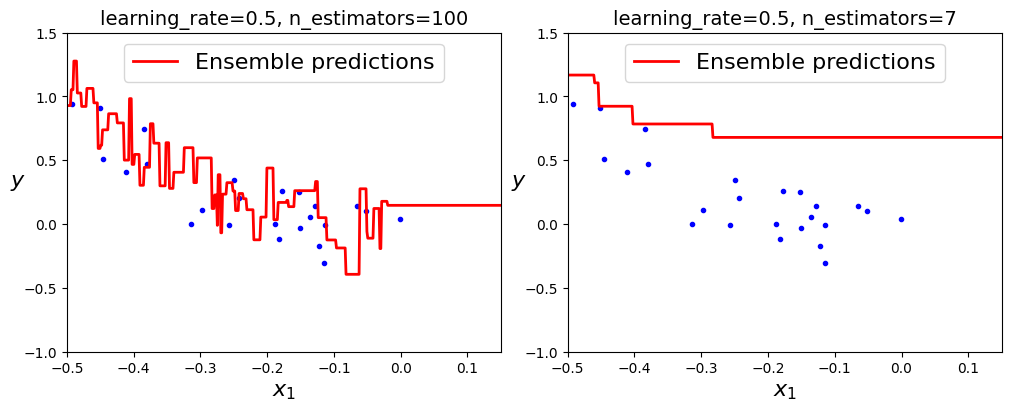

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X = np.random.rand(160, 1) - 1
y = pow(2 * (X[:, 0]),2) + 0.2 * np.random.randn(160)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 42)
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 1.0, random_state = 42)
gbrt.fit(X_train,y_train)

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X_test[:, 0], y_test, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), constrained_layout=True)
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.15, -1, 1.5], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators, random_state = 42)
gbrt_best.fit(X_train, y_train)
min_error = np.min(errors)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.15, -1, 1.5], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, bst_n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()